In [ ]:
"""
A.S.M. Shahria
1603067
"""

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from matplotlib import style


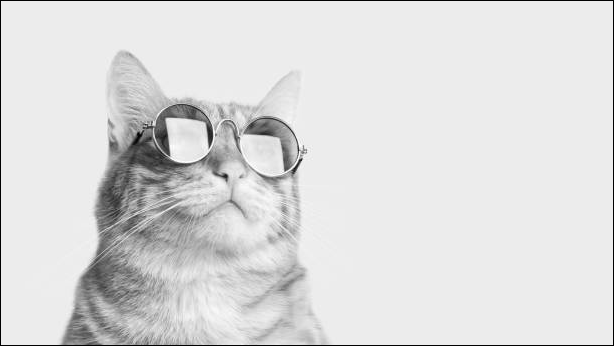

In [ ]:
#Code 3
#read an image
img = cv.imread("/content/drive/MyDrive/Colab Notebooks/cat.jpg")

#Convert into grayscale image
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#cv2_imshow(img) 
dim = img.shape
blank = np.zeros((dim[0]+2, dim[1]+2), dtype='uint8')
for i in range(dim[0]):
  for j in range(dim[1]):
    blank[i+1][j+1] = img[i][j]

cv2_imshow(blank) 

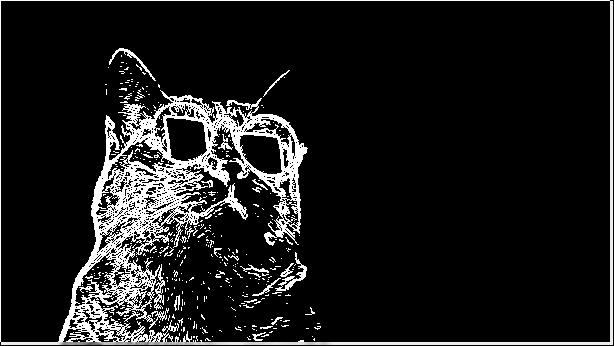

In [ ]:
#Edge detection using Sobel Operator (threshold = 400)
sobel = blank.copy()

sobelx = [[-1, -2, -1],
          [0, 0, 0],
          [1, 2, 1]]
sobely = [[-1, 0, 1],
          [-2, 0, 2],
          [-1, 0, 1]]
k = 70
for i in range(0, dim[0]-2):
  for j in range(0, dim[1]-2):
    gx = 0
    gy = 0
    for m in range(3):
      for n in range(3):
        gx = gx + sobel[i+m][j+n]*sobelx[m][n]
        gy = gy + sobel[i+m][j+n]*sobely[m][n]
    g = np.sqrt(gx*gx+gy*gy)
    if g<k:
      sobel[i][j] = 0
    else:
      sobel[i][j] = 255

cv2_imshow(sobel) 


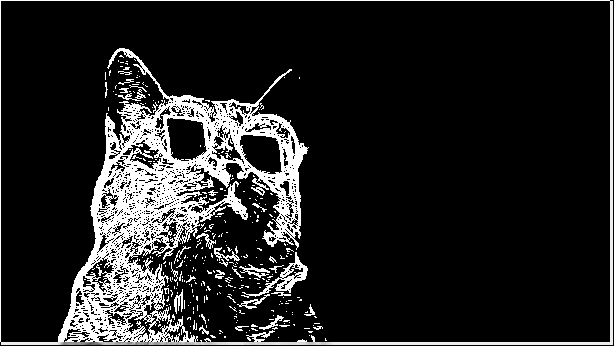

In [ ]:
#Edge detection using Prewitt Operator (threshold = 300)
prewitt = blank.copy()

px = [[-1, -1, -1],
      [0, 0, 0],
      [1, 1, 1]]
py = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]
k = 40
for i in range(0, dim[0]-2):
  for j in range(0, dim[1]-2):
    gx = 0
    gy = 0
    for m in range(3):
      for n in range(3):
        gx = gx + prewitt[i+m][j+n]*px[m][n]
        gy = gy + prewitt[i+m][j+n]*py[m][n]
    g = np.sqrt(gx*gx+gy*gy) 
    if g<k:
      prewitt[i][j] = 0
    else:
      prewitt[i][j] = 255
cv2_imshow(prewitt) 

223.12629182245232


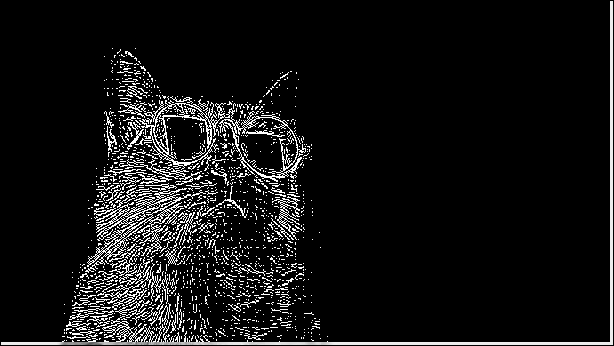

In [ ]:
#Edge detection using Positive Laplacian Operator (threshold = 100)
lap = blank.copy()

positive = [[0, 1, 0],
      [1, -4, 1],
      [0, 1, 0]]
negative = [[0, -1, 0],
      [-1, 4, -1],
      [0, -1, 0]]
k = 20

for i in range(0, dim[0]-2):
  for j in range(0, dim[1]-2):
    gx = 0
    gy = 0
    for m in range(3):
      for n in range(3):
        gx = gx + lap[i+m][j+n]*positive[m][n]
        gy = gy + lap[i+m][j+n]*negative[m][n]
    g = gx - gy
    
    if g<k:
      lap[i][j] = 0
    else:
      lap[i][j] = 255
print(sum/count)   
cv2_imshow(lap)

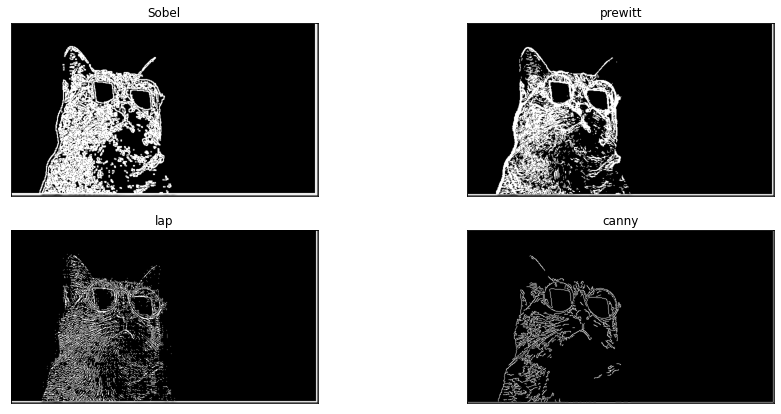

In [ ]:
plt.figure(figsize = (15, 7))
canny = cv.Canny(blank,100,200)
plt.subplot(221),plt.imshow(sobel,cmap = 'gray')
plt.title('Sobel'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(prewitt,cmap = 'gray')
plt.title('prewitt'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(lap,cmap = 'gray')
plt.title('lap'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(canny,cmap = 'gray')
plt.title('canny'), plt.xticks([]), plt.yticks([])
plt.show()